In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## X data 불러오기

In [2]:
x_data = pd.read_csv('D:/6.교육/FD2_Analysis.L_XDATA.csv')
print(x_data.columns)
x_data

Index(['TIME', 'EQP 2', 'MODULE 2', 'LOT_ID 2', 'TIME_PROCESS', 'Para 01',
       'Para 02', 'Para 03', 'Para 04', 'Para 05', 'Para 06', 'Para 07',
       'Para 08', 'Para 09', 'Para 10', 'Para 11', 'Para 12', 'Para 13',
       'Para 14', 'Para 15', 'Para 16', 'Para 17', 'Para 18', 'Para 19'],
      dtype='object')


,TIME,EQP 2,MODULE 2,LOT_ID 2,TIME_PROCESS,Para 01,Para 02,Para 03,Para 04,Para 05,...,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,14:17.9,C,D,ABCAC29,1,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,14:18.9,C,D,ABCAC29,2,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,14:19.9,C,D,ABCAC29,3,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,14:20.9,C,D,ABCAC29,4,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,...,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,14:21.9,C,D,ABCAC29,5,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,...,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,21:39.3,B,C,ABCAM73,596,0.211300,0.173656,-1.024975,-0.309126,0.076406,...,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,21:40.2,B,C,ABCAM73,597,0.211300,0.173656,-1.024975,-0.318330,0.076406,...,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,21:41.4,B,C,ABCAM73,598,0.211300,0.173656,-1.024975,-0.322931,0.076406,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,21:42.4,B,C,ABCAM73,599,0.035757,0.173656,1.102850,-0.327533,0.057933,...,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


## Y data 불러오기

In [3]:
y_data = pd.read_csv('D:/6.교육/FD2_Analysis.L_YDATA.csv')
print(y_data.columns)
y_data

Index(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], dtype='object')


,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response
0,ABCA764,3,7,-55,48,-0.198842
1,ABCA764,3,8,-55,-17,-0.006703
2,ABCA764,3,11,-100,81,-0.115168
3,ABCA764,3,3,-10,15,-0.000505
4,ABCA764,3,1,-122,15,0.442652
...,...,...,...,...,...,...
35173,ABC9321,3,6,35,48,-0.394079
35174,ABC9321,3,13,80,-50,-0.394079
35175,ABC9321,3,9,35,-17,-0.434366
35176,ABC9321,3,10,80,81,-0.431267


## 사용하지 않는 X변수 제거

In [4]:
x_data = x_data.drop(['TIME','EQP 2', 'MODULE 2','TIME_PROCESS'], axis=1)
x_data

,LOT_ID 2,Para 01,Para 02,Para 03,Para 04,Para 05,Para 06,Para 07,Para 08,Para 09,Para 10,Para 11,Para 12,Para 13,Para 14,Para 15,Para 16,Para 17,Para 18,Para 19
0,ABCAC29,-0.139785,-0.753355,-1.024975,-1.505540,-0.237628,-0.134672,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
1,ABCAC29,-0.139785,-0.753355,-1.024975,-1.408907,-0.219155,-0.134672,2.415552,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.743457,-1.029292,-2.853902,2.222534
2,ABCAC29,-0.139785,0.173656,-1.024975,-1.289265,-0.237628,-0.134672,0.542658,1.111967,1.359035,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.648641,-1.029292,-2.853902,2.335617
3,ABCAC29,-0.139785,0.173656,-1.024975,-1.169624,-0.219155,0.975136,1.791254,1.111967,1.359035,1.884452,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.553824,-1.006165,-2.853902,2.222534
4,ABCAC29,-0.139785,0.173656,-1.024975,-0.999365,-0.237628,-0.134672,0.542658,1.111967,0.755216,2.137315,1.482281,-1.932399,-0.380771,-0.380771,0.003895,0.364192,-1.006165,-2.853902,2.222534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508201,ABCAM73,0.211300,0.173656,-1.024975,-0.309126,0.076406,-0.504608,0.542658,-0.710376,-1.358148,0.114413,-1.159996,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508202,ABCAM73,0.211300,0.173656,-1.024975,-0.318330,0.076406,-1.244481,0.542658,-0.710376,-1.358148,0.114413,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508203,ABCAM73,0.211300,0.173656,-1.024975,-0.322931,0.076406,-1.244481,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851
508204,ABCAM73,0.035757,0.173656,1.102850,-0.327533,0.057933,-0.504608,0.542658,-1.317824,-1.056239,0.367276,-0.956744,0.187298,0.480142,0.480142,0.402657,-0.015074,1.283399,0.503272,-1.056851


## X, Y 결측치 파악

In [5]:
x_data.isnull().sum()

LOT_ID 2    0
Para 01     0
Para 02     0
Para 03     0
Para 04     0
Para 05     0
Para 06     0
Para 07     0
Para 08     0
Para 09     0
Para 10     0
Para 11     0
Para 12     0
Para 13     0
Para 14     0
Para 15     0
Para 16     0
Para 17     0
Para 18     0
Para 19     0
dtype: int64

In [6]:
y_data.isnull().sum()

LOT_ID 2     0
WF_ID        0
Site         0
X axis       0
Y axis       0
Response    14
dtype: int64

In [7]:
y_data = y_data.dropna()
y_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response
0,ABCA764,3,7,-55,48,-0.198842
1,ABCA764,3,8,-55,-17,-0.006703
2,ABCA764,3,11,-100,81,-0.115168
3,ABCA764,3,3,-10,15,-0.000505
4,ABCA764,3,1,-122,15,0.442652
...,...,...,...,...,...,...
35173,ABC9321,3,6,35,48,-0.394079
35174,ABC9321,3,13,80,-50,-0.394079
35175,ABC9321,3,9,35,-17,-0.434366
35176,ABC9321,3,10,80,81,-0.431267


## LOT_ID별 mean, max, min, var 값 요약

In [8]:
mean_data = x_data.groupby(x_data['LOT_ID 2']).mean() 
max_data = x_data.groupby(x_data['LOT_ID 2']).max()
min_data = x_data.groupby(x_data['LOT_ID 2']).min() 
var_data = x_data.groupby(x_data['LOT_ID 2']).var()

## X, Y 데이터 병합

In [10]:
full_data = y_data.merge(mean_data, on='LOT_ID 2').merge(max_data, on='LOT_ID 2').merge(min_data, on='LOT_ID 2').merge(var_data, on='LOT_ID 2')
full_data

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response,Para 01_x,Para 02_x,Para 03_x,Para 04_x,...,Para 10_y,Para 11_y,Para 12_y,Para 13_y,Para 14_y,Para 15_y,Para 16_y,Para 17_y,Para 18_y,Para 19_y
0,ABCA764,3,7,-55,48,-0.198842,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
1,ABCA764,3,8,-55,-17,-0.006703,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
2,ABCA764,3,11,-100,81,-0.115168,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
3,ABCA764,3,3,-10,15,-0.000505,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
4,ABCA764,3,1,-122,15,0.442652,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35159,ABC9567,3,6,35,48,-0.759761,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072
35160,ABC9567,3,13,80,-50,-0.465356,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072
35161,ABC9567,3,9,35,-17,-0.434366,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072
35162,ABC9567,3,10,80,81,-0.400277,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072


In [11]:
full_data.columns

Index(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response',
       'Para 01_x', 'Para 02_x', 'Para 03_x', 'Para 04_x', 'Para 05_x',
       'Para 06_x', 'Para 07_x', 'Para 08_x', 'Para 09_x', 'Para 10_x',
       'Para 11_x', 'Para 12_x', 'Para 13_x', 'Para 14_x', 'Para 15_x',
       'Para 16_x', 'Para 17_x', 'Para 18_x', 'Para 19_x', 'Para 01_y',
       'Para 02_y', 'Para 03_y', 'Para 04_y', 'Para 05_y', 'Para 06_y',
       'Para 07_y', 'Para 08_y', 'Para 09_y', 'Para 10_y', 'Para 11_y',
       'Para 12_y', 'Para 13_y', 'Para 14_y', 'Para 15_y', 'Para 16_y',
       'Para 17_y', 'Para 18_y', 'Para 19_y', 'Para 01_x', 'Para 02_x',
       'Para 03_x', 'Para 04_x', 'Para 05_x', 'Para 06_x', 'Para 07_x',
       'Para 08_x', 'Para 09_x', 'Para 10_x', 'Para 11_x', 'Para 12_x',
       'Para 13_x', 'Para 14_x', 'Para 15_x', 'Para 16_x', 'Para 17_x',
       'Para 18_x', 'Para 19_x', 'Para 01_y', 'Para 02_y', 'Para 03_y',
       'Para 04_y', 'Para 05_y', 'Para 06_y', 'Para 07_y', 'Para 08_

In [12]:
data_x = full_data.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis', 'Response'], axis=1)
data_y = full_data['Response']

## Train, Test Split

In [13]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=2020)

## 전체 data에 대한 Linear 모델 통계량

In [14]:
lm = sm.OLS(train_y, train_x).fit()
# lm.summary()

## 전체 데이터에 대한 Linear 예측 결과

In [15]:
data_pred = lm.predict(test_x)

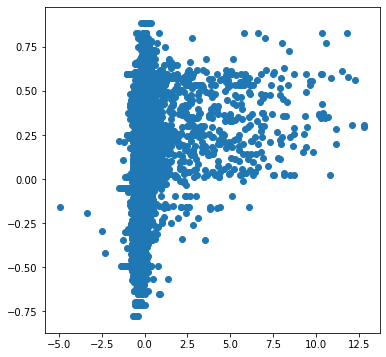

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(test_y, data_pred)
plt.show()

## 전체 데이터에 대한 Linear, DT, RandomForest 예측 결과

Training MSE in Linear: 1.363
Testing MSE in Linear: 1.180
Training MSE in DT: 1.184
Testing MSE in DT: 1.136
Training MSE in RandomForest: 1.184
Testing MSE in RandomForest: 1.079
Training R2 in Linear: 0.064
Testing R2 in Linear: 0.055
Training R2 in DT: 0.187
Testing R2 in DT: 0.089
Training R2 in RandomForest: 0.186
Testing R2 in RandomForest: 0.135


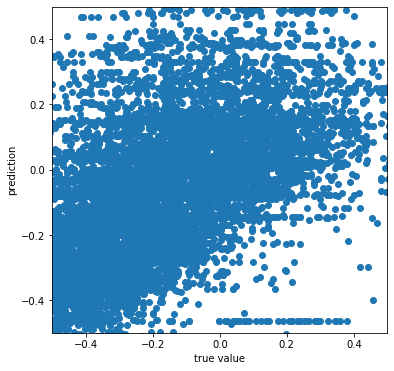

In [17]:
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site = 1(같은 위치)인 데이터로 분석

In [18]:
data_1 = full_data[full_data['Site'] == 1]
data_1

,LOT_ID 2,WF_ID,Site,X axis,Y axis,Response,Para 01_x,Para 02_x,Para 03_x,Para 04_x,...,Para 10_y,Para 11_y,Para 12_y,Para 13_y,Para 14_y,Para 15_y,Para 16_y,Para 17_y,Para 18_y,Para 19_y
4,ABCA764,3,1,-122,15,0.442652,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
17,ABCA764,23,1,-122,15,1.322770,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
30,ABCA764,13,1,-122,15,2.723520,0.310317,-0.027634,-0.042412,-0.552697,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
43,ABCA096,3,1,-122,15,-0.201941,0.215681,0.000902,0.010599,-0.256710,...,0.062818,0.030501,0.084847,0.707074,0.707074,0.823537,0.745272,0.010263,0.000931,0.027169
56,ABCA096,23,1,-122,15,-0.294911,0.215681,0.000902,0.010599,-0.256710,...,0.062818,0.030501,0.084847,0.707074,0.707074,0.823537,0.745272,0.010263,0.000931,0.027169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,ABCA954,3,1,-122,15,1.806215,-0.894824,-0.033032,0.078063,0.755640,...,0.014124,0.069331,0.105570,1.163436,1.163436,0.725298,0.726192,0.010673,0.000932,0.168672
35116,ABCA954,13,1,-122,15,0.640989,-0.894824,-0.033032,0.078063,0.755640,...,0.014124,0.069331,0.105570,1.163436,1.163436,0.725298,0.726192,0.010673,0.000932,0.168672
35129,ABC9567,23,1,-122,15,-0.394079,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072
35142,ABC9567,13,1,-122,15,-0.378584,0.758667,-0.044600,-0.056858,1.445626,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072


In [19]:
data_1 = data_1.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_1

,Response,Para 01_x,Para 02_x,Para 03_x,Para 04_x,Para 05_x,Para 06_x,Para 07_x,Para 08_x,Para 09_x,...,Para 10_y,Para 11_y,Para 12_y,Para 13_y,Para 14_y,Para 15_y,Para 16_y,Para 17_y,Para 18_y,Para 19_y
4,0.442652,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
17,1.322770,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
30,2.723520,0.310317,-0.027634,-0.042412,-0.552697,-0.520095,0.353447,-0.511689,0.991691,-0.962300,...,0.047332,0.045901,0.075428,0.489690,0.489690,0.963889,0.635366,0.012451,0.000841,0.177030
43,-0.201941,0.215681,0.000902,0.010599,-0.256710,-0.649771,-0.107589,-0.390153,1.151891,-0.346426,...,0.062818,0.030501,0.084847,0.707074,0.707074,0.823537,0.745272,0.010263,0.000931,0.027169
56,-0.294911,0.215681,0.000902,0.010599,-0.256710,-0.649771,-0.107589,-0.390153,1.151891,-0.346426,...,0.062818,0.030501,0.084847,0.707074,0.707074,0.823537,0.745272,0.010263,0.000931,0.027169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35103,1.806215,-0.894824,-0.033032,0.078063,0.755640,0.849456,0.110311,1.457810,0.943681,0.582912,...,0.014124,0.069331,0.105570,1.163436,1.163436,0.725298,0.726192,0.010673,0.000932,0.168672
35116,0.640989,-0.894824,-0.033032,0.078063,0.755640,0.849456,0.110311,1.457810,0.943681,0.582912,...,0.014124,0.069331,0.105570,1.163436,1.163436,0.725298,0.726192,0.010673,0.000932,0.168672
35129,-0.394079,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072
35142,-0.378584,0.758667,-0.044600,-0.056858,1.445626,-0.871165,-0.129132,0.238300,-1.117700,1.348486,...,0.051793,0.011936,0.100936,1.246272,1.246272,1.178216,1.180753,0.020353,0.000449,0.012072


In [20]:
data_1_X = data_1.drop(['Response'], axis=1)
data_1_Y = data_1['Response']

## Train, Test Split

In [21]:
train_x, test_x, train_y, test_y = train_test_split(data_1_X, data_1_Y, test_size=0.3, random_state=2020)

## X 데이터 정규화

In [22]:
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

In [23]:
lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()
#lm_trained.summary()

In [24]:
y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

## DecisionTree 모델 구축

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2020, splitter='best')

In [26]:
y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

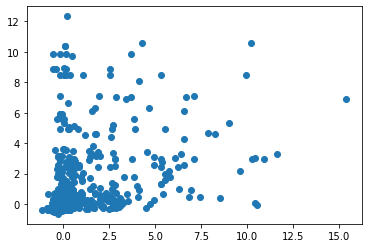

In [27]:
plt.scatter(test_y, y_pred_ts_tree)

## Linear Regression, DecisionTree 결과값 도출

### MSE 결과값

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))

Training MSE in Linear: 3.831
Testing MSE in Linear: 3.135
Training MSE in DT: 1.496
Testing MSE in DT: 5.157


### R_squared 결과값

In [29]:
print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))

Training R2 in Linear: 0.171
Testing R2 in Linear: 0.118
Training R2 in DT: 0.676
Testing R2 in DT: -0.450


## RandomForest 모델 구축

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2020, verbose=0, warm_start=False)

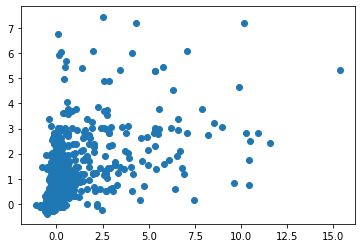

In [31]:
y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)
plt.scatter(test_y, y_pred_ts_rf)

### MSE 결과값

In [32]:
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

Training MSE in RandomForest: 1.590
Testing MSE in RandomForest: 2.890


### R_squared 결과값

In [33]:
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

Training R2 in RandomForest: 0.656
Testing R2 in RandomForest: 0.187


## Site=2일 때 결과 도출

Training MSE in Linear: 4.310
Testing MSE in Linear: 4.099
Training MSE in DT: 1.507
Testing MSE in DT: 7.790
Training MSE in RandomForest: 1.626
Testing MSE in RandomForest: 3.876
Training R2 in Linear: 0.160
Testing R2 in Linear: 0.152
Training R2 in DT: 0.706
Testing R2 in DT: -0.611
Training R2 in RandomForest: 0.683
Testing R2 in RandomForest: 0.198


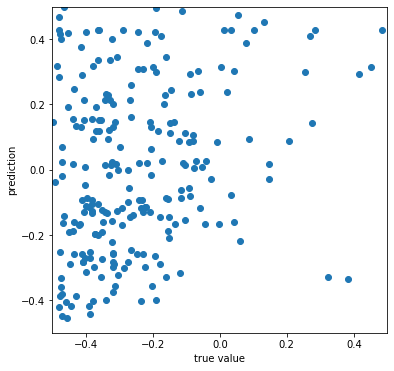

In [34]:
data_2 = full_data[full_data['Site'] == 2]
data_2 = data_2.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_2_X = data_2.drop(['Response'], axis=1)
data_2_Y = data_2['Response']

train_x, test_x, train_y, test_y = train_test_split(data_2_X, data_2_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=3일 때 결과 도출

Training MSE in Linear: 0.060
Testing MSE in Linear: 0.046
Training MSE in DT: 0.032
Testing MSE in DT: 0.058
Training MSE in RandomForest: 0.033
Testing MSE in RandomForest: 0.037
Training R2 in Linear: 0.371
Testing R2 in Linear: 0.351
Training R2 in DT: 0.662
Testing R2 in DT: 0.188
Training R2 in RandomForest: 0.655
Testing R2 in RandomForest: 0.477


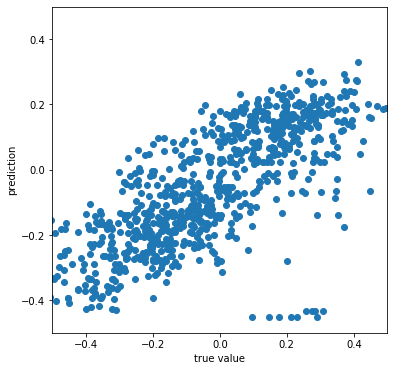

In [35]:
data_3 = full_data[full_data['Site'] == 3]
data_3 = data_3.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_3_X = data_3.drop(['Response'], axis=1)
data_3_Y = data_3['Response']

train_x, test_x, train_y, test_y = train_test_split(data_3_X, data_3_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=4일 때 결과 도출

Training MSE in Linear: 0.155
Testing MSE in Linear: 0.189
Training MSE in DT: 0.054
Testing MSE in DT: 0.454
Training MSE in RandomForest: 0.061
Testing MSE in RandomForest: 0.214
Training R2 in Linear: 0.138
Testing R2 in Linear: 0.044
Training R2 in DT: 0.698
Testing R2 in DT: -1.293
Training R2 in RandomForest: 0.663
Testing R2 in RandomForest: -0.082


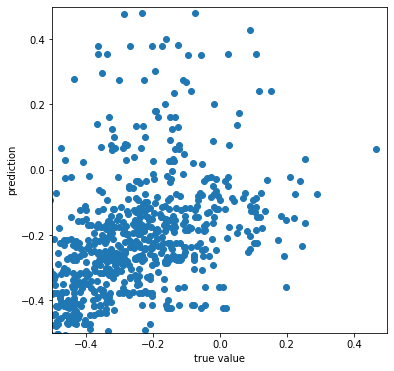

In [36]:
data_4 = full_data[full_data['Site'] == 4]
data_4 = data_4.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_4_X = data_4.drop(['Response'], axis=1)
data_4_Y = data_4['Response']

train_x, test_x, train_y, test_y = train_test_split(data_4_X, data_4_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=5일 때 결과 도출

Training MSE in Linear: 0.061
Testing MSE in Linear: 0.066
Training MSE in DT: 0.026
Testing MSE in DT: 0.096
Training MSE in RandomForest: 0.027
Testing MSE in RandomForest: 0.058
Training R2 in Linear: 0.313
Testing R2 in Linear: 0.257
Training R2 in DT: 0.706
Testing R2 in DT: -0.081
Training R2 in RandomForest: 0.692
Testing R2 in RandomForest: 0.342


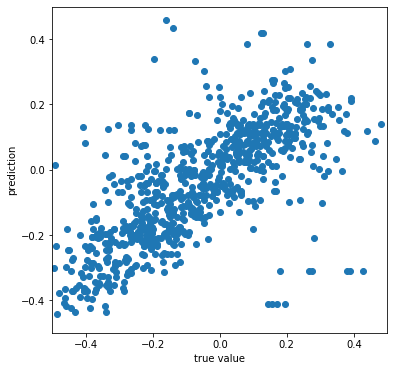

In [37]:
data_5 = full_data[full_data['Site'] == 5]
data_5 = data_5.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_5_X = data_5.drop(['Response'], axis=1)
data_5_Y = data_5['Response']

train_x, test_x, train_y, test_y = train_test_split(data_5_X, data_5_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=6일 때 결과 도출

Training MSE in Linear: 0.044
Testing MSE in Linear: 0.054
Training MSE in DT: 0.019
Testing MSE in DT: 0.065
Training MSE in RandomForest: 0.020
Testing MSE in RandomForest: 0.046
Training R2 in Linear: 0.376
Testing R2 in Linear: 0.285
Training R2 in DT: 0.725
Testing R2 in DT: 0.142
Training R2 in RandomForest: 0.714
Testing R2 in RandomForest: 0.389


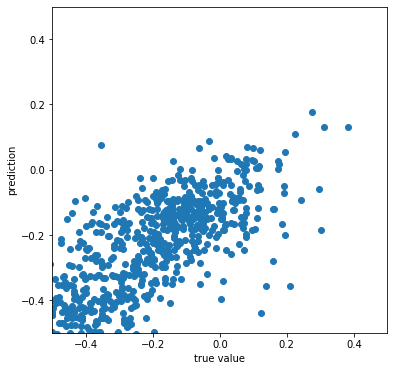

In [38]:
data_6 = full_data[full_data['Site'] == 6]
data_6 = data_6.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_6_X = data_6.drop(['Response'], axis=1)
data_6_Y = data_6['Response']

train_x, test_x, train_y, test_y = train_test_split(data_6_X, data_6_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=7일 때 결과 도출

Training MSE in Linear: 0.029
Testing MSE in Linear: 0.032
Training MSE in DT: 0.013
Testing MSE in DT: 0.039
Training MSE in RandomForest: 0.013
Testing MSE in RandomForest: 0.026
Training R2 in Linear: 0.423
Testing R2 in Linear: 0.364
Training R2 in DT: 0.753
Testing R2 in DT: 0.215
Training R2 in RandomForest: 0.745
Testing R2 in RandomForest: 0.488


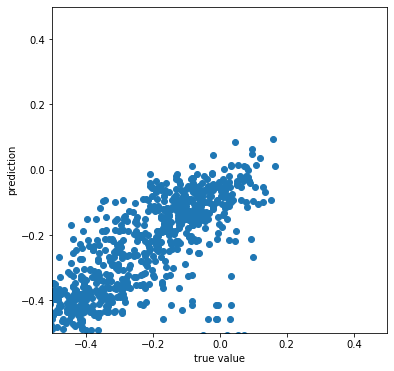

In [39]:
data_7 = full_data[full_data['Site'] == 7]
data_7 = data_7.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_7_X = data_7.drop(['Response'], axis=1)
data_7_Y = data_7['Response']

train_x, test_x, train_y, test_y = train_test_split(data_7_X, data_7_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=8일 때 결과 도출

Training MSE in Linear: 0.043
Testing MSE in Linear: 0.041
Training MSE in DT: 0.017
Testing MSE in DT: 0.050
Training MSE in RandomForest: 0.018
Testing MSE in RandomForest: 0.030
Training R2 in Linear: 0.376
Testing R2 in Linear: 0.341
Training R2 in DT: 0.750
Testing R2 in DT: 0.199
Training R2 in RandomForest: 0.742
Testing R2 in RandomForest: 0.522


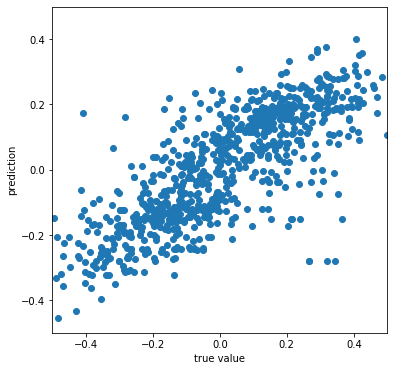

In [40]:
data_8 = full_data[full_data['Site'] == 8]
data_8 = data_8.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_8_X = data_8.drop(['Response'], axis=1)
data_8_Y = data_8['Response']

train_x, test_x, train_y, test_y = train_test_split(data_8_X, data_8_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=9 일 때 결과 도출

Training MSE in Linear: 0.036
Testing MSE in Linear: 0.036
Training MSE in DT: 0.016
Testing MSE in DT: 0.044
Training MSE in RandomForest: 0.017
Testing MSE in RandomForest: 0.031
Training R2 in Linear: 0.439
Testing R2 in Linear: 0.410
Training R2 in DT: 0.745
Testing R2 in DT: 0.274
Training R2 in RandomForest: 0.737
Testing R2 in RandomForest: 0.490


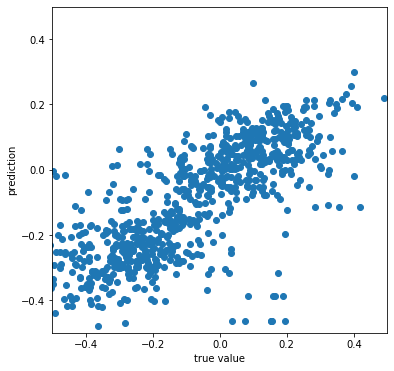

In [41]:
data_9 = full_data[full_data['Site'] == 9]
data_9 = data_9.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_9_X = data_9.drop(['Response'], axis=1)
data_9_Y = data_9['Response']

train_x, test_x, train_y, test_y = train_test_split(data_9_X, data_9_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=10일 때 결과 도출

Training MSE in Linear: 0.139
Testing MSE in Linear: 0.155
Training MSE in DT: 0.057
Testing MSE in DT: 0.233
Training MSE in RandomForest: 0.061
Testing MSE in RandomForest: 0.147
Training R2 in Linear: 0.148
Testing R2 in Linear: 0.097
Training R2 in DT: 0.650
Testing R2 in DT: -0.356
Training R2 in RandomForest: 0.626
Testing R2 in RandomForest: 0.147


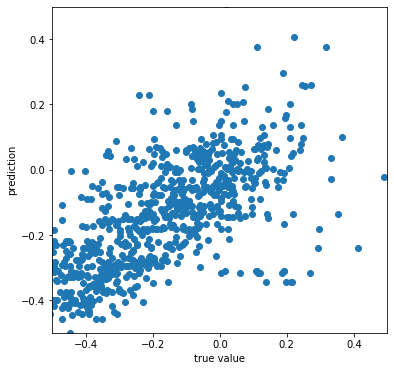

In [42]:
data_10 = full_data[full_data['Site'] == 10]
data_10 = data_10.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_10_X = data_10.drop(['Response'], axis=1)
data_10_Y = data_10['Response']

train_x, test_x, train_y, test_y = train_test_split(data_10_X, data_10_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=11일 때 결과 도출

Training MSE in Linear: 3.972
Testing MSE in Linear: 3.555
Training MSE in DT: 1.548
Testing MSE in DT: 4.471
Training MSE in RandomForest: 1.662
Testing MSE in RandomForest: 3.013
Training R2 in Linear: 0.193
Testing R2 in Linear: 0.162
Training R2 in DT: 0.685
Testing R2 in DT: -0.054
Training R2 in RandomForest: 0.662
Testing R2 in RandomForest: 0.290


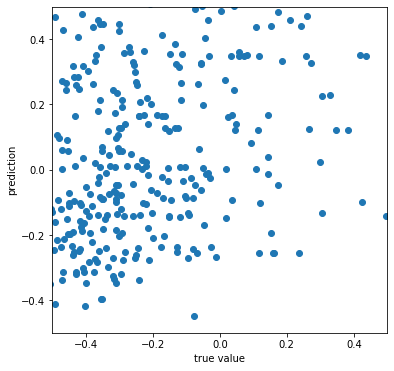

In [43]:
data_11 = full_data[full_data['Site'] == 11]
data_11 = data_11.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_11_X = data_11.drop(['Response'], axis=1)
data_11_Y = data_11['Response']

train_x, test_x, train_y, test_y = train_test_split(data_11_X, data_11_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=12일 때 결과 도출

Training MSE in Linear: 1.194
Testing MSE in Linear: 1.192
Training MSE in DT: 0.524
Testing MSE in DT: 1.681
Training MSE in RandomForest: 0.560
Testing MSE in RandomForest: 1.133
Training R2 in Linear: 0.142
Testing R2 in Linear: 0.084
Training R2 in DT: 0.623
Testing R2 in DT: -0.291
Training R2 in RandomForest: 0.598
Testing R2 in RandomForest: 0.130


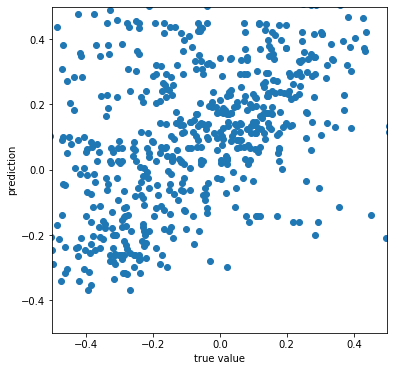

In [44]:
data_12 = full_data[full_data['Site'] == 12]
data_12 = data_12.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_12_X = data_12.drop(['Response'], axis=1)
data_12_Y = data_12['Response']

train_x, test_x, train_y, test_y = train_test_split(data_12_X, data_12_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))

## Site=13일 때 결과 도출

Training MSE in Linear: 0.038
Testing MSE in Linear: 0.037
Training MSE in DT: 0.014
Testing MSE in DT: 0.046
Training MSE in RandomForest: 0.015
Testing MSE in RandomForest: 0.031
Training R2 in Linear: 0.370
Testing R2 in Linear: 0.342
Training R2 in DT: 0.762
Testing R2 in DT: 0.184
Training R2 in RandomForest: 0.752
Testing R2 in RandomForest: 0.448


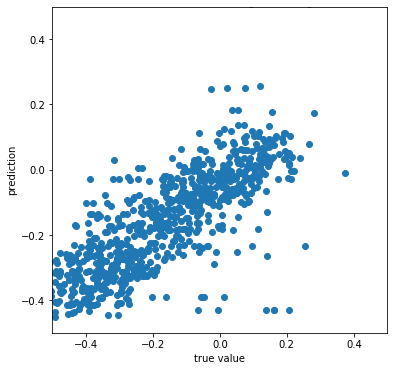

In [45]:
data_13 = full_data[full_data['Site'] == 13]
data_13 = data_13.drop(['LOT_ID 2', 'WF_ID', 'Site', 'X axis', 'Y axis'], axis=1)
data_13_X = data_13.drop(['Response'], axis=1)
data_13_Y = data_13['Response']

train_x, test_x, train_y, test_y = train_test_split(data_13_X, data_13_Y, test_size=0.3, random_state=2020)

sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x)
test_x_sc = sc.fit_transform(test_x)

lm = sm.OLS(train_y, train_x)
lm_trained = lm.fit()

y_pred_tr_lm = lm_trained.predict(train_x)
y_pred_ts_lm= lm_trained.predict(test_x)

dt_reg = DecisionTreeRegressor(random_state=2020)
dt_reg.fit(train_x_sc, train_y)

y_pred_tr_tree = dt_reg.predict(train_x_sc)
y_pred_ts_tree = dt_reg.predict(test_x_sc)

rf = RandomForestRegressor(max_depth=30, n_estimators=100, random_state=2020)
rf.fit(train_x_sc, train_y)

y_pred_tr_rf = rf.predict(train_x_sc)
y_pred_ts_rf = rf.predict(test_x_sc)

plt.figure(figsize=(6,6))
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('true value')
plt.ylabel('prediction')
plt.scatter(test_y, y_pred_ts_rf)

print('Training MSE in Linear: {:.3f}' .format(mean_squared_error(train_y, y_pred_tr_lm)))
print('Testing MSE in Linear: {:.3f}' .format(mean_squared_error(test_y, y_pred_ts_lm)))
print('Training MSE in DT: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_tree)))
print('Testing MSE in DT: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_tree)))
print('Training MSE in RandomForest: {:.3f}'.format(mean_squared_error(train_y, y_pred_tr_rf)))
print('Testing MSE in RandomForest: {:.3f}'.format(mean_squared_error(test_y, y_pred_ts_rf)))

print('Training R2 in Linear: {:.3f}' .format(r2_score(train_y, y_pred_tr_lm)))
print('Testing R2 in Linear: {:.3f}' .format(r2_score(test_y, y_pred_ts_lm)))
print('Training R2 in DT: {:.3f}'.format(r2_score(train_y, y_pred_tr_tree)))
print('Testing R2 in DT: {:.3f}'.format(r2_score(test_y, y_pred_ts_tree)))
print('Training R2 in RandomForest: {:.3f}' .format(r2_score(train_y, y_pred_tr_rf)))
print('Testing R2 in RandomForest: {:.3f}' .format(r2_score(test_y, y_pred_ts_rf)))